In [1]:
# NBA Prediction Data Sci Model
# Install required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc

In [4]:
# Naming files (update with your actual file paths)
train_file = "/content/NBA_train.csv"
test_file = "/content/NBA_test.csv"
sample_submission_file = "/content/NBA_sample_submission.csv" #to cross-check final file vs. sample submission

In [5]:
# Step 1: Initial Setup and Data Understanding
# Load the datasets
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [7]:
# summary train dataset
print("Train Dataset Info:\n")
print(train_df.info())
print("\nTrain Dataset Head:\n", train_df.head())

Train Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null 

In [8]:
# summary test dataset
print("Test Dataset Info:\n")
print(test_df.info())
print("\nTest Dataset Head:\n", test_df.head())

Test Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory 

In [9]:
# Check missing values
print("\nMissing Values in Train Dataset:\n", train_df.isnull().sum())
print("\nMissing Values in Test Dataset:\n", test_df.isnull().sum())


Missing Values in Train Dataset:
 Id             0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

Missing Values in Test Dataset:
 Id         0
GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64


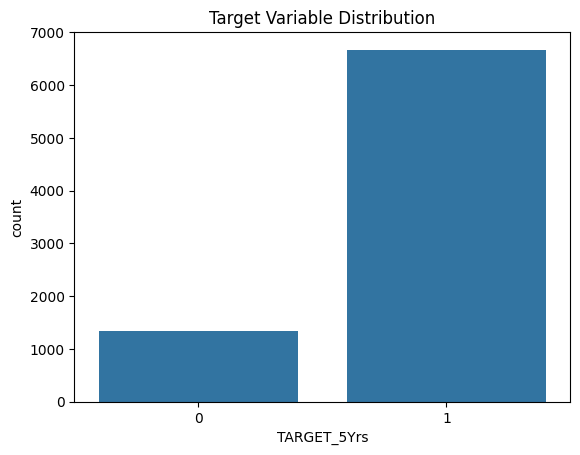

In [11]:
# Visualise target variable distribution
sns.countplot(x='TARGET_5Yrs', data=train_df)
plt.title("Target Variable Distribution")
plt.show()